Cloning into 'Face-Mask-Detection'...
remote: Enumerating objects: 4590, done.
remote: Total 4590 (delta 0), reused 0 (delta 0), pack-reused 4590 (from 1)
Receiving objects: 100% (4590/4590), 186.72 MiB | 12.97 MiB/s, done.
Resolving deltas: 100% (271/271), done.
Updating files: 100% (4155/4155), done.
訓練集與驗證集建立完成！
Found 3274 images belonging to 2 classes.
Found 818 images belonging to 2 classes.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1054: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


102/102 ━━━━━━━━━━━━━━━━━━━━ 73s 537ms/step - accuracy: 0.7915 - loss: 0.4340 - val_accuracy: 0.9725 - val_loss: 0.0985
Epoch 2/10
  1/102 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.9062 - loss: 0.2596

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


102/102 ━━━━━━━━━━━━━━━━━━━━ 11s 106ms/step - accuracy: 0.9062 - loss: 0.2596 - val_accuracy: 1.0000 - val_loss: 0.0814
Epoch 3/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 111s 485ms/step - accuracy: 0.9324 - loss: 0.1854 - val_accuracy: 0.9850 - val_loss: 0.0584
Epoch 4/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9688 - loss: 0.1062 - val_accuracy: 1.0000 - val_loss: 0.0174
Epoch 5/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 51s 476ms/step - accuracy: 0.9422 - loss: 0.1648 - val_accuracy: 0.9800 - val_loss: 0.0658
Epoch 6/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9688 - loss: 0.1571 - val_accuracy: 1.0000 - val_loss: 0.0290
Epoch 7/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 52s 482ms/step - accuracy: 0.9449 - loss: 0.1525 - val_accuracy: 0.9900 - val_loss: 0.0416
Epoch 8/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8750 - loss: 0.2749 - val_accuracy: 1.0000 - val_loss: 0.0100
Epoch 9/10
102/102 ━━━━━━━━━━━━━━━━━━━━ 81s 469ms/step - accuracy: 0.9555 - loss: 0.1314 - val_accur

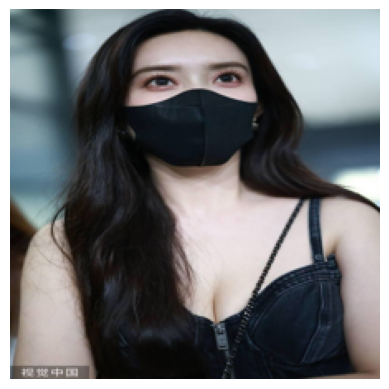

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
預測結果: 有口罩


In [1]:
# 匯入所需的套件
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import os
import shutil
import requests
from PIL import Image
import random
from sklearn.model_selection import train_test_split

# Step 1: 下載並準備醫療口罩資料集
import pathlib
if not pathlib.Path("Face-Mask-Detection").exists():
    !git clone https://github.com/chandrikadeb7/Face-Mask-Detection.git
else:
    print("資料集已存在，跳過下載。")

# 取得有口罩與無口罩的照片路徑
base_dataset_dir = "Face-Mask-Detection/dataset"
with_mask_dir = os.path.join(base_dataset_dir, "with_mask")
without_mask_dir = os.path.join(base_dataset_dir, "without_mask")

if not os.path.exists(with_mask_dir) or not os.path.exists(without_mask_dir):
    raise FileNotFoundError("'with_mask' 或 'without_mask' 資料夾不存在，請確認資料集結構！")

# 建立新的訓練集與驗證集目錄
output_base_dir = "prepared_dataset"
train_dir = os.path.join(output_base_dir, "train")
val_dir = os.path.join(output_base_dir, "val")
train_with_mask_dir = os.path.join(train_dir, "with_mask")
train_without_mask_dir = os.path.join(train_dir, "without_mask")
val_with_mask_dir = os.path.join(val_dir, "with_mask")
val_without_mask_dir = os.path.join(val_dir, "without_mask")

# 移除並重建目錄
if os.path.exists(output_base_dir):
    shutil.rmtree(output_base_dir)
os.makedirs(train_with_mask_dir)
os.makedirs(train_without_mask_dir)
os.makedirs(val_with_mask_dir)
os.makedirs(val_without_mask_dir)

# 列出所有圖片並進行 8:2 切分
with_mask_images = [os.path.join(with_mask_dir, img) for img in os.listdir(with_mask_dir)]
without_mask_images = [os.path.join(without_mask_dir, img) for img in os.listdir(without_mask_dir)]

train_with_mask, val_with_mask = train_test_split(with_mask_images, test_size=0.2, random_state=42)
train_without_mask, val_without_mask = train_test_split(without_mask_images, test_size=0.2, random_state=42)

# 複製圖片到對應目錄
def copy_images(image_list, target_dir):
    for img_path in image_list:
        shutil.copy(img_path, target_dir)

copy_images(train_with_mask, train_with_mask_dir)
copy_images(train_without_mask, train_without_mask_dir)
copy_images(val_with_mask, val_with_mask_dir)
copy_images(val_without_mask, val_without_mask_dir)

print("訓練集與驗證集建立完成！")

# Step 2: 建立資料集生成器
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'  # 2類: 有口罩 / 無口罩
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

# Step 3: 建立遷移學習模型
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 冻結預訓練層
vgg_base.trainable = False

model = models.Sequential([
    vgg_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # 2類分類
])

# 編譯模型
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(learning_rate=1e-4),
              metrics=['accuracy'])

# Step 4: 訓練模型
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

# Step 5: 測試函數 - 輸入圖片 URL 進行分類
def test_image(image_url, model, classes):
    # 下載圖片
    response = requests.get(image_url, stream=True)
    img = Image.open(response.raw).resize((224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # 預處理圖片
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # rescale

    # 預測
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        print("預測結果: 無口罩")
    else:
        print("預測結果: 有口罩")

# 範例使用
image_url = input("請輸入圖片 URL: ")
test_image(image_url, model, train_generator.class_indices)
